<a href="https://colab.research.google.com/github/MeikoFudo/YOLOv5-Object-Detection/blob/develop/yolov5_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display
import torch

In [ ]:
dataset_paths = [
    "/kaggle/input/bd-street-object-detection-dataset",
    "/kaggle/input/dataset-for-driver-assistant-ml-models",
    "/kaggle/input/streetview-photospheres",
    "/kaggle/input/street-object-detection-dataset"
]

all_images = []

def find_images_in_directory(directory, image_extensions=(".jpg", ".jpeg", ".png")):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(image_extensions):
                all_images.append(os.path.join(root, file))

for dataset_path in dataset_paths:
    find_images_in_directory(dataset_path)

print(f"Найдено изображений: {len(all_images)}")

print("Примеры изображений:")
for image_path in all_images[:10]:
    print(image_path)


Найдено изображений: 210362
Примеры изображений:
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured18.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured4.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured5.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured12.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured30.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured24.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured15.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured28.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured11.jpg
/kaggle/input/bd-street-object-detection-dataset/kaggle/obj/captured13.jpg


# Displaying a Random Image

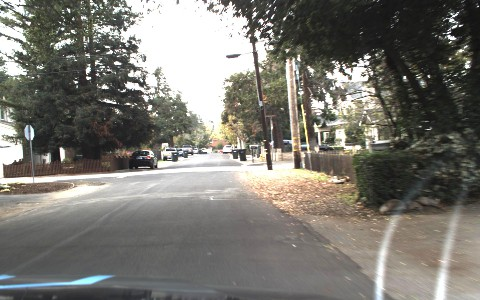

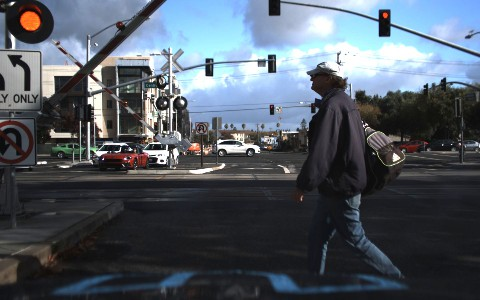

In [ ]:
all_images = os.listdir(base_path)

random_image = random.choice(all_images)

img = Image.open(os.path.join(base_path, random_image))
display(img)
all_images = os.listdir(base_path)

random_image = random.choice(all_images)

img = Image.open(os.path.join(base_path, random_image))
display(img)



# Object Detection with YOLOv5

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 4 cars
Speed: 12.1ms pre-process, 146.8ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478900468076440611.jpg


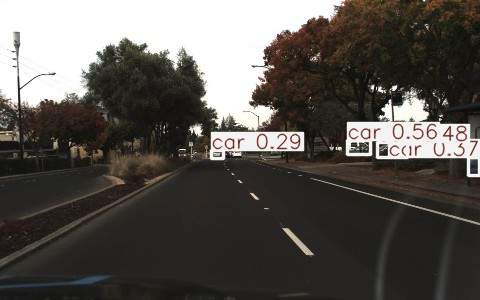

In [ ]:
def load_model(model_name='yolov5s'):
    """Загрузить модель YOLOv5."""
    try:
        model = torch.hub.load('ultralytics/yolov5', model_name, pretrained=True, trust_repo=True)
        return model
    except Exception as e:
        print(f"Ошибка при загрузке модели: {e}")
        return None

def perform_inference(model, image_paths):
    """Выполнить инференс на указанных изображениях."""
    if model is None:
        print("Модель не загружена. Инференс не может быть выполнен.")
        return None

    try:
        results = model(image_paths)
        return results
    except Exception as e:
        print(f"Ошибка при выполнении инференса: {e}")
        return None

def visualize_results(results):
    """Печать и визуализация результатов обнаружения."""
    if results is not None:
        results.print()
        results.show()

def find_all_images_recursive(base_folder, image_extensions=('.jpg', '.jpeg', '.png')):
    """Рекурсивно найти все изображения в каталоге."""
    image_files = []
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

def main(image_paths):
    """Основная функция для выполнения обнаружения объектов на случайном изображении."""
    model = load_model()
    if model is not None and image_paths:
        random_image_path = random.choice(image_paths)
        print(f"Выбрано изображение: {random_image_path}")

        results = perform_inference(model, [random_image_path])
        visualize_results(results)

source_folder = base_path

all_images = find_all_images_recursive(source_folder)

if not all_images:
    print("Не найдено изображений в указанной директории.")
else:
    main(all_images)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 persons, 6 cars, 1 truck, 1 traffic light
Speed: 14.7ms pre-process, 144.2ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478899592289225139.jpg


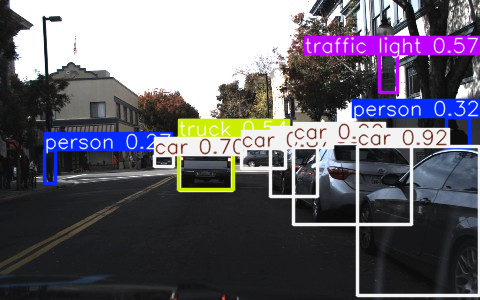

None


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 cars, 1 truck, 4 traffic lights
Speed: 13.1ms pre-process, 162.5ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479501651189908903.jpg


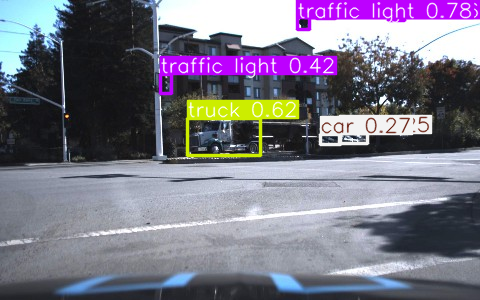

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU



None


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 persons, 6 cars, 1 truck, 1 traffic light
Speed: 5.2ms pre-process, 143.1ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478899592289225139.jpg


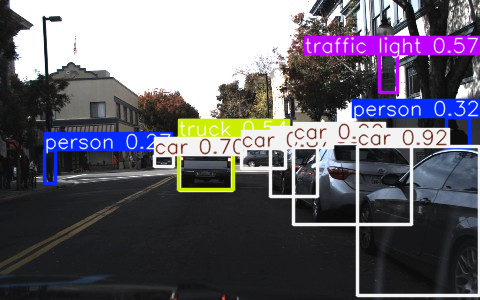

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 3 cars, 1 truck
Speed: 14.3ms pre-process, 141.6ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478901014801778941.jpg


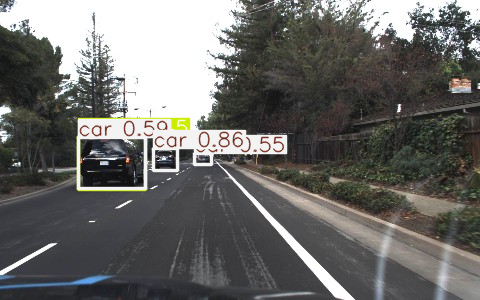

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU



None


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 1 car, 6 traffic lights
Speed: 11.6ms pre-process, 139.0ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479500710123463446.jpg


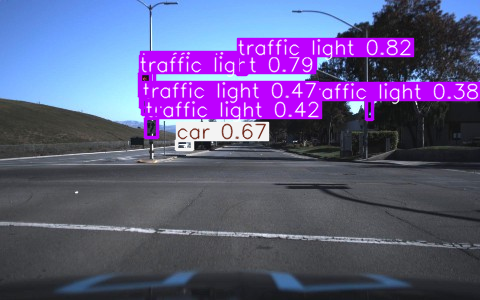

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 cars, 1 truck, 4 traffic lights
Speed: 5.5ms pre-process, 141.2ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479501651189908903.jpg


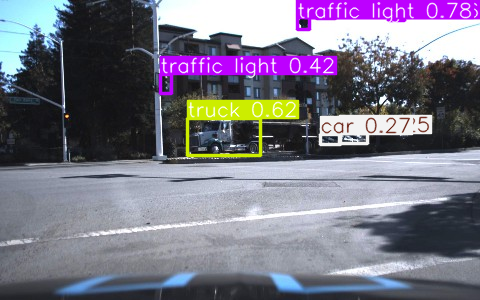

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 1 car, 6 traffic lights
Speed: 5.0ms pre-process, 141.1ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479500710123463446.jpg


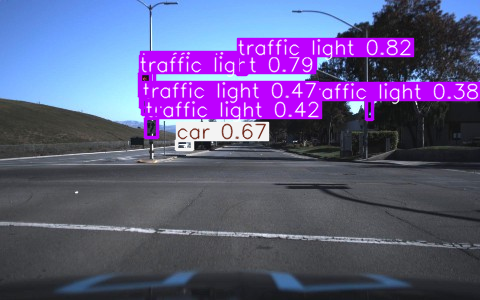

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


image 1/1: 300x480 1 car, 6 traffic lights
Speed: 4.9ms pre-process, 138.5ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479500710123463446.jpg


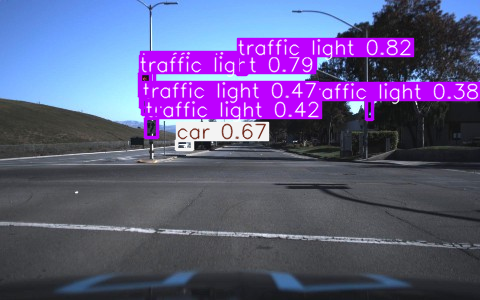

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 persons, 6 cars, 1 truck, 1 traffic light
Speed: 5.4ms pre-process, 148.5ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478899592289225139.jpg


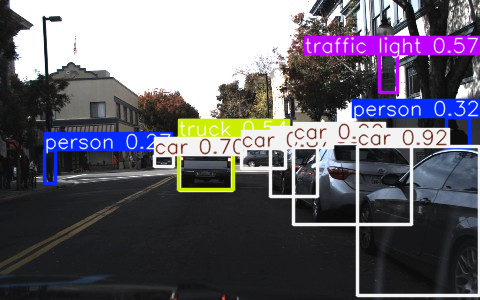

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 5 cars, 2 trucks
Speed: 14.0ms pre-process, 142.6ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478732987340896685.jpg


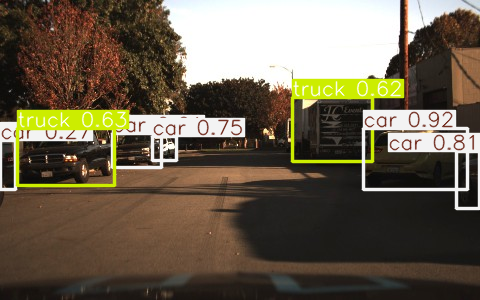

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU



None


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 4 cars, 1 potted plant
Speed: 11.9ms pre-process, 143.3ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479504090857737164.jpg


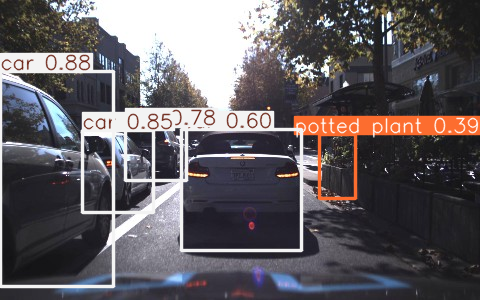

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 2 cars, 1 truck, 4 traffic lights
Speed: 5.2ms pre-process, 140.9ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479501651189908903.jpg


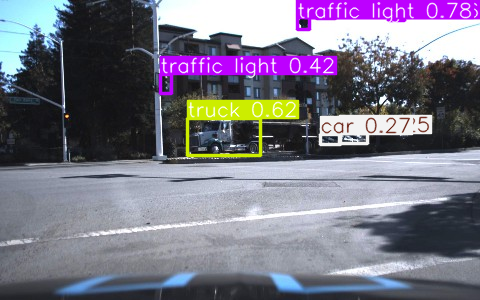

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 1 car
Speed: 11.0ms pre-process, 144.6ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479498987006260306.jpg


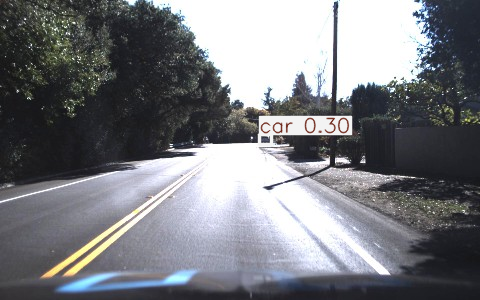

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 3 persons, 4 cars, 3 traffic lights
Speed: 11.0ms pre-process, 140.2ms inference, 1.4ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478899603714923687.jpg


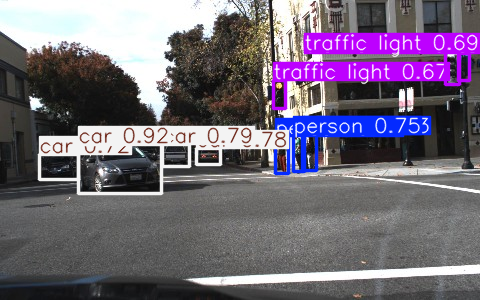

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 1 car
Speed: 5.2ms pre-process, 139.7ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479498987006260306.jpg


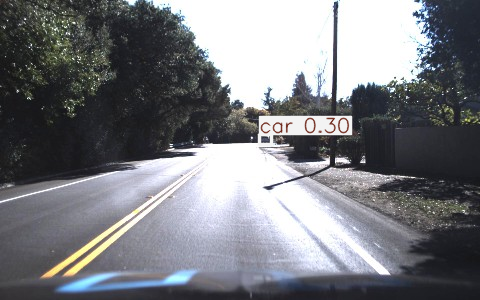

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 7 cars
Speed: 14.3ms pre-process, 149.5ms inference, 1.3ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478901140484306032.jpg


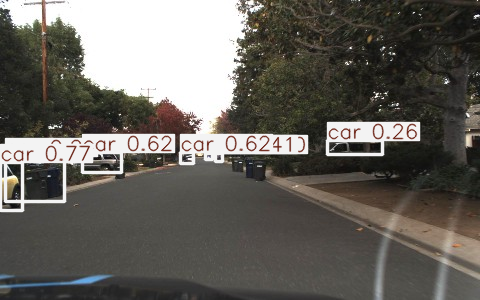

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 7 cars
Speed: 5.1ms pre-process, 141.3ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478901140484306032.jpg


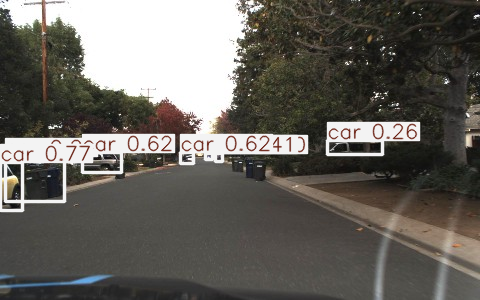

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 1 car
Speed: 5.2ms pre-process, 137.2ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479498987006260306.jpg


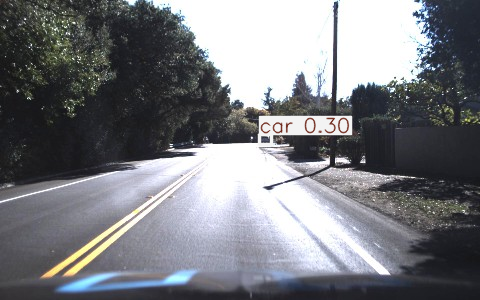

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 5 cars, 2 trucks
Speed: 5.1ms pre-process, 149.5ms inference, 1.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1478732987340896685.jpg


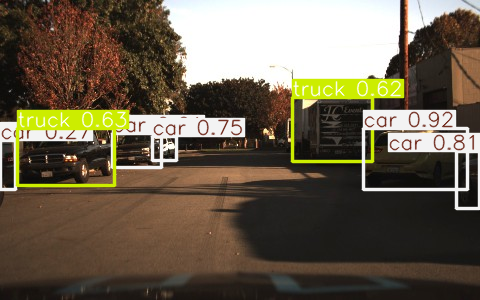

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.0.0+cpu CPU

Fusing layers... 


None


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 300x480 11 cars, 3 traffic lights, 1 umbrella
Speed: 20.9ms pre-process, 153.1ms inference, 3.2ms NMS per image at shape (1, 3, 416, 640)


Выбрано изображение: /kaggle/input/street-object-detection-dataset/images/images/images/1479504311866552558.jpg


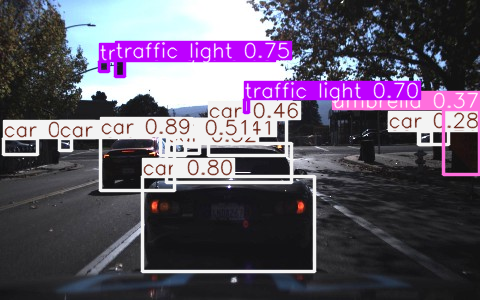

None


In [ ]:
random_image_paths = []

for _ in range(20):
    random_image_paths.append(random.choice(all_images))
    results = main(random_image_paths)
    print(results)